# Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:
# Read the data from csv file
day_data = pd.read_csv('day.csv')

In [4]:
# Checking the data of dataset
 
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Let's inspect the different aspects of  dataframe

In [5]:
day_data.shape

(730, 16)

In [6]:
#Checking for null values
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- There are no null values

In [7]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# checking for the null values in column data

day_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Let's rename few columns for better readability 
day_data.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [10]:
day_data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- Mapping the columns with string values

In [11]:
#Converting features values of season column into string values
day_data.season = day_data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [12]:
#Converting features values of month column into string values
day_data.month = day_data.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [13]:
#Converting features values of weekday column into string values
day_data.weekday = day_data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [14]:
#Converting features values of weathersit column into string values
day_data.weathersit = day_data.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

Dropping the unwanted columns


In [15]:
# instant has only index for the row;
#dteday has date which can be compensated by year and month column;
# casual and registered seems to be the breakup by category for cnt column.

day_data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [16]:
#Checking dataframe after doing the mapping of string values and dropping of columns
day_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# Step 2: Visualising the Data
Let's now visualise our data using seaborn. We'll first make a boxplot of all the variables present to visualise which variables are most correlated to target variable cnt.

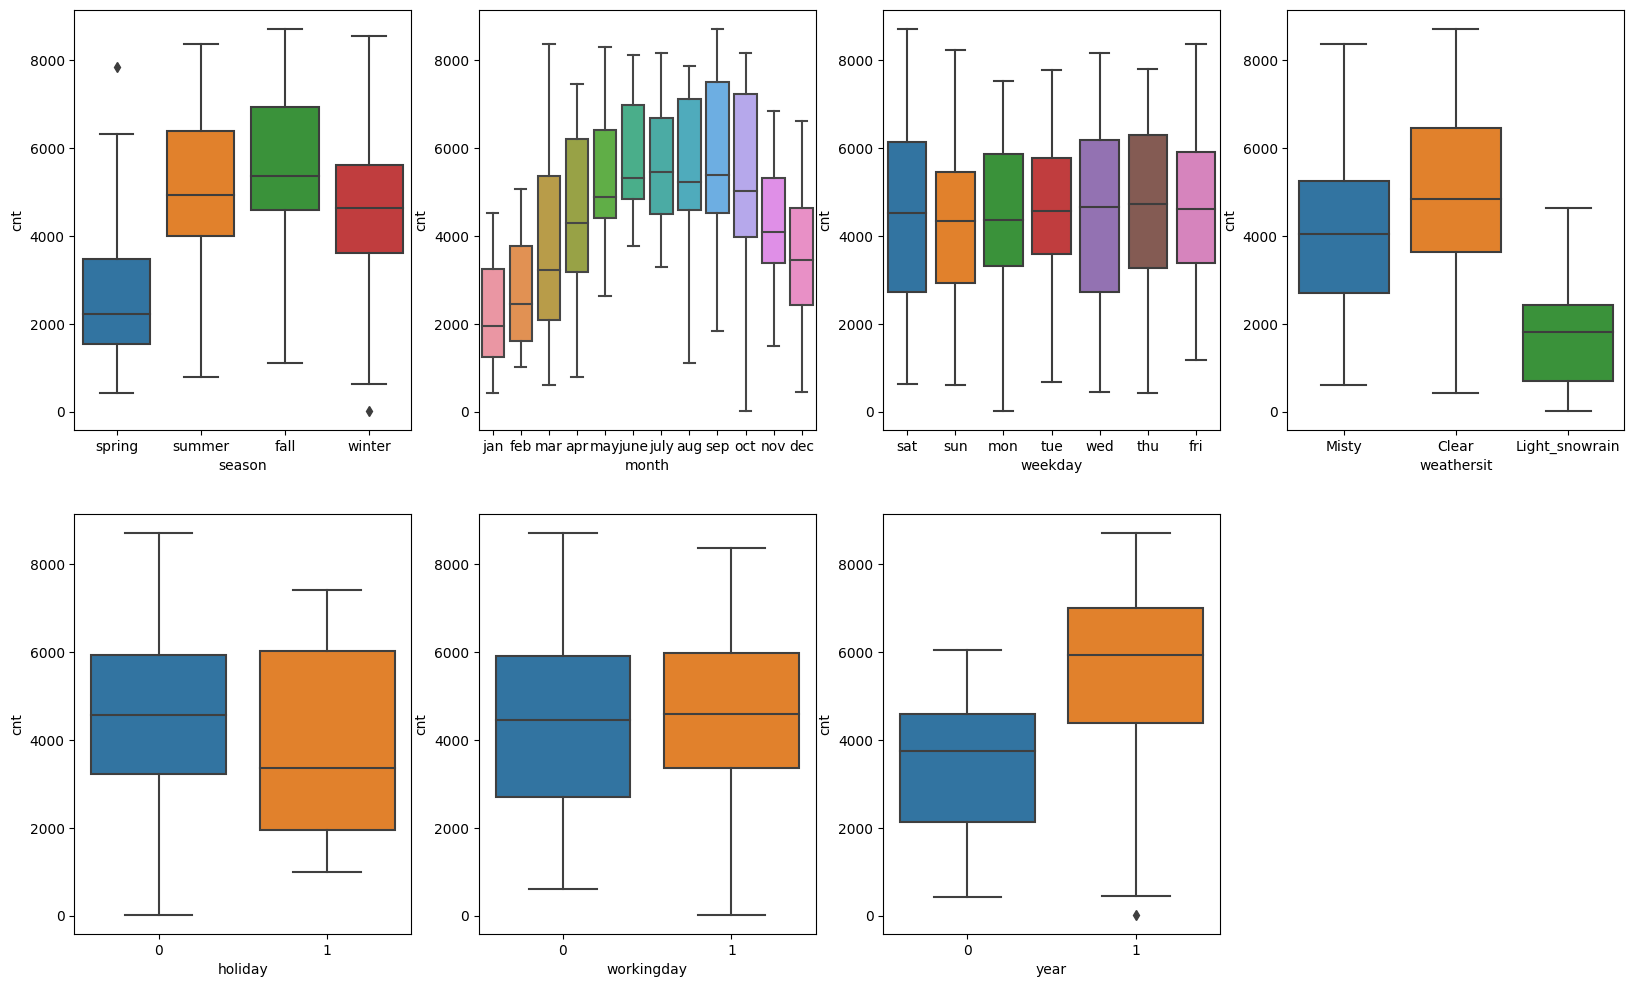

In [18]:
# Visualizing the categorical columns
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = day_data)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = day_data)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = day_data)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day_data)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = day_data)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = day_data)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = day_data)
plt.show()

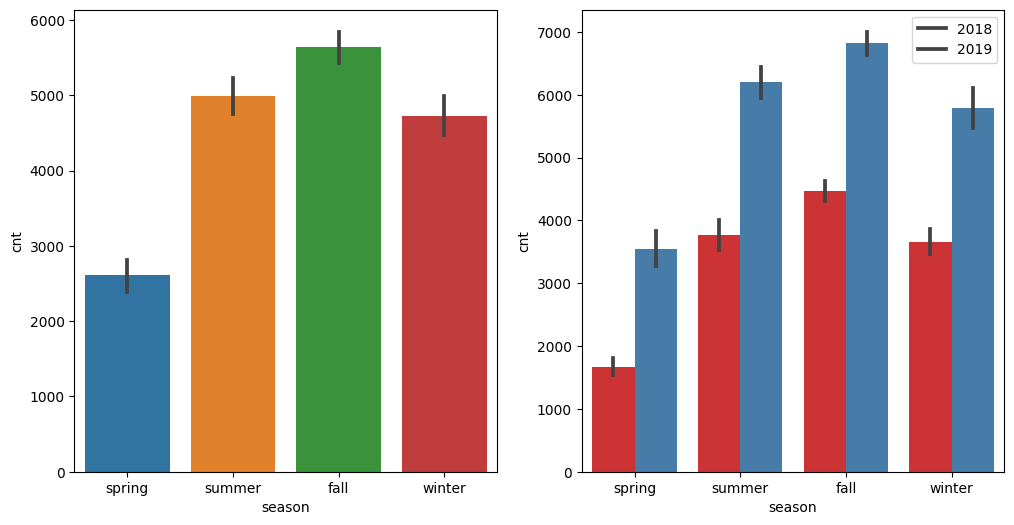

In [19]:
# plotting visualization for season column

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x='season',y='cnt',data=day_data)
plt.subplot(1,2,2)
sns.barplot(x='season',y='cnt',data=day_data, hue='year',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

Fall season shows more booking and for each season the booking count has increased drastically from 2018 to 2019.

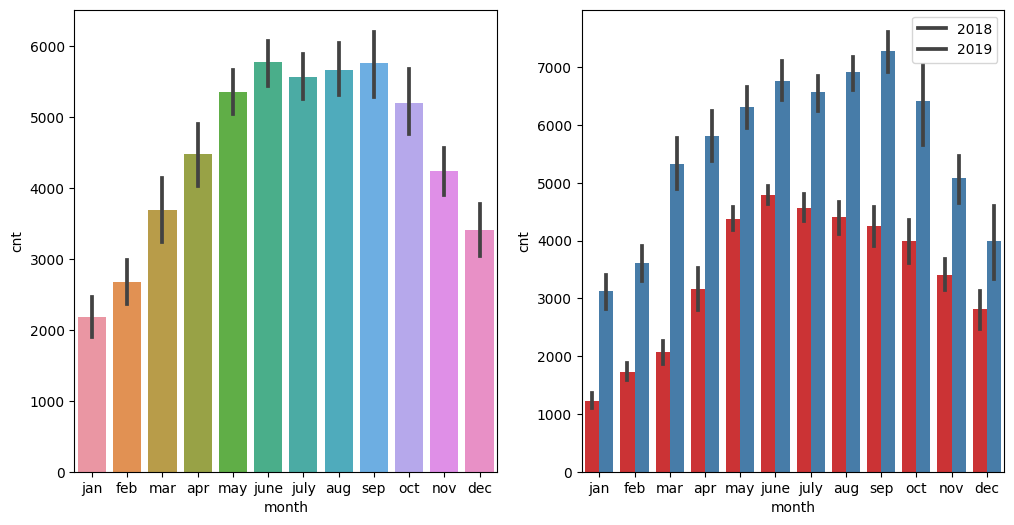

In [20]:
# plotting visualization for month column
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x='month',y='cnt',data=day_data)
plt.subplot(1,2,2)
sns.barplot(x='month',y='cnt',data=day_data, hue='year',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

- Most of the bookings are done from month of May to Oct.
- Bookings increased in the start of the year till mid of year and then   it decreased towards the end of year. 
- Number of booking for each month have increased from 2018 to 2019.

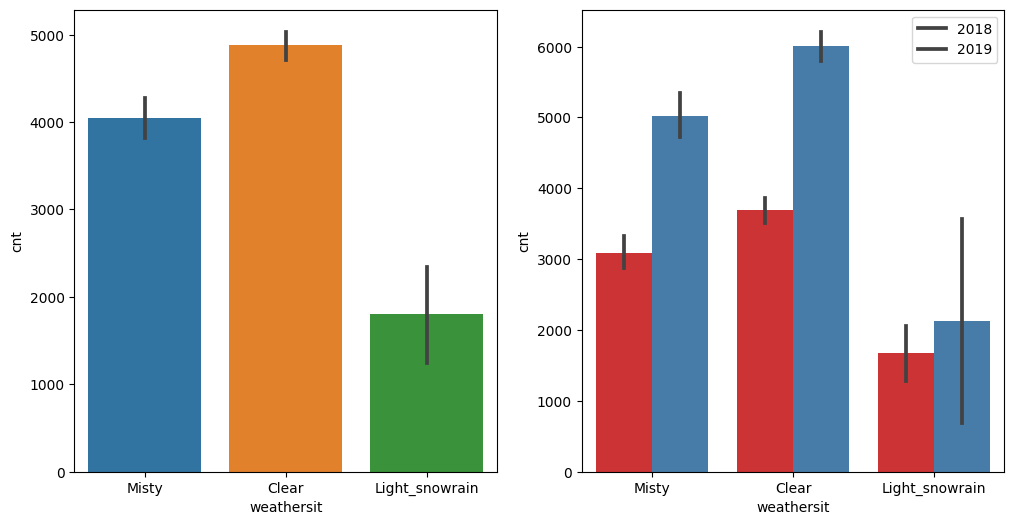

In [21]:
# plotting visualization for weathersit column
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x='weathersit',y='cnt',data=day_data)
plt.subplot(1,2,2)
sns.barplot(x='weathersit',y='cnt',data=day_data, hue='year',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

- As it was Clear weather, there were more booking.
- Booking increased for each weather situation from 2018 to 2019.

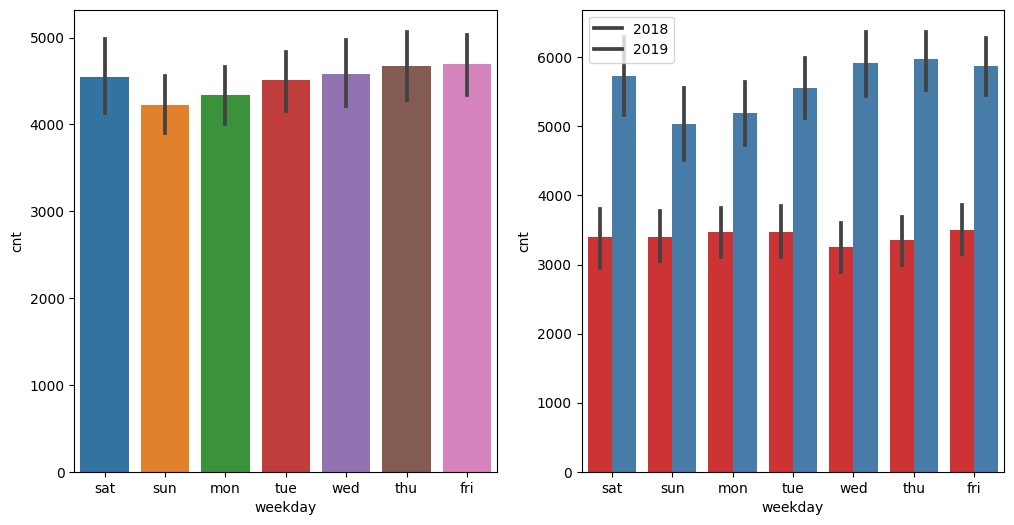

In [22]:
# plotting visualization for weekday column
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x='weekday',y='cnt',data=day_data)
plt.subplot(1,2,2)
sns.barplot(x='weekday',y='cnt',data=day_data, hue='year',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

- There are more booking from Wednesday to Saturday.
- Booking increased for each weekday from 2018 to 2019.

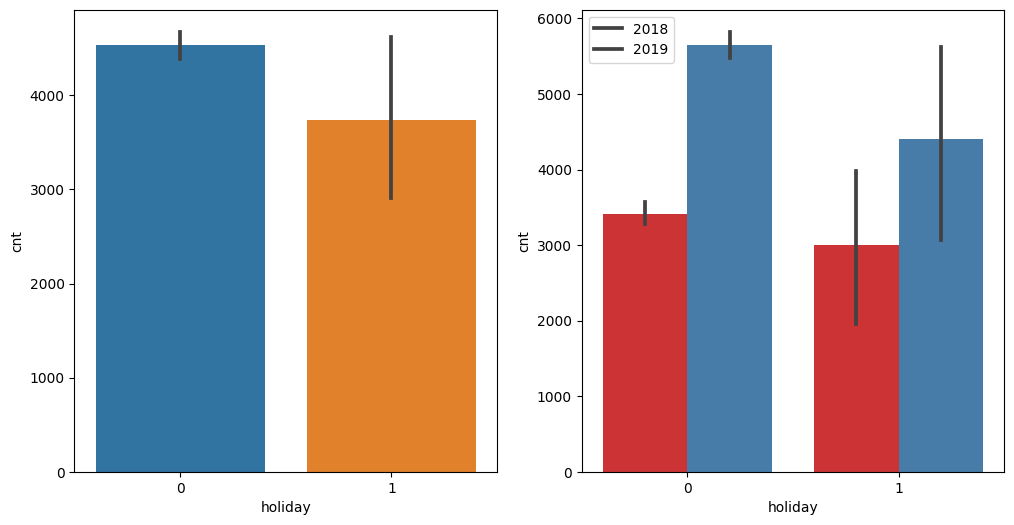

In [23]:
# plotting visualization for holiday column
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x='holiday',y='cnt',data=day_data)
plt.subplot(1,2,2)
sns.barplot(x='holiday',y='cnt',data=day_data, hue='year',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

- Bookings are more on holidays then compared to non-holidays.
- Bookings have increased for holidays from 2018 to 2019 

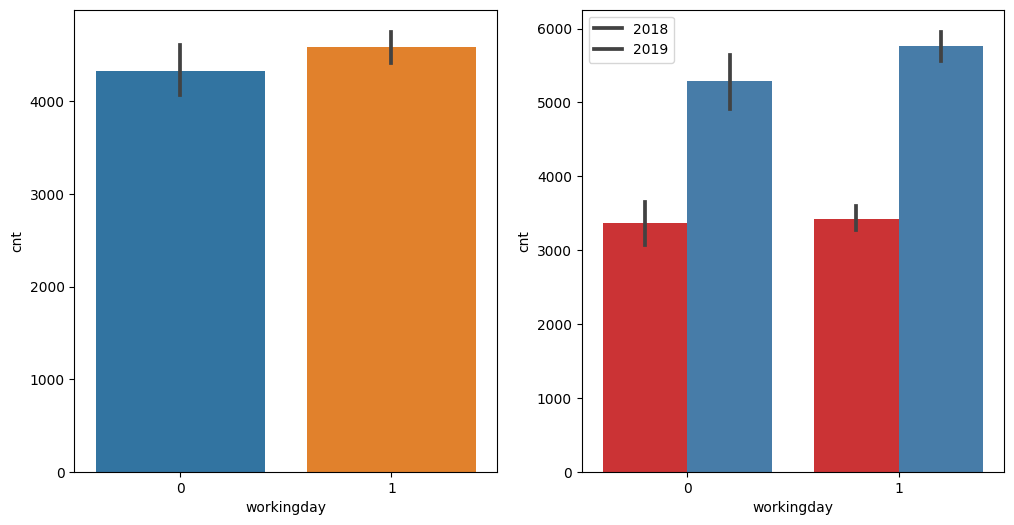

In [24]:
# plotting visualization for workingday column
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x='workingday',y='cnt',data=day_data)
plt.subplot(1,2,2)
sns.barplot(x='workingday',y='cnt',data=day_data, hue='year',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

- There is no significant difference in the booking done on working day or non working day, but the count has increased from 2018 to 2019.

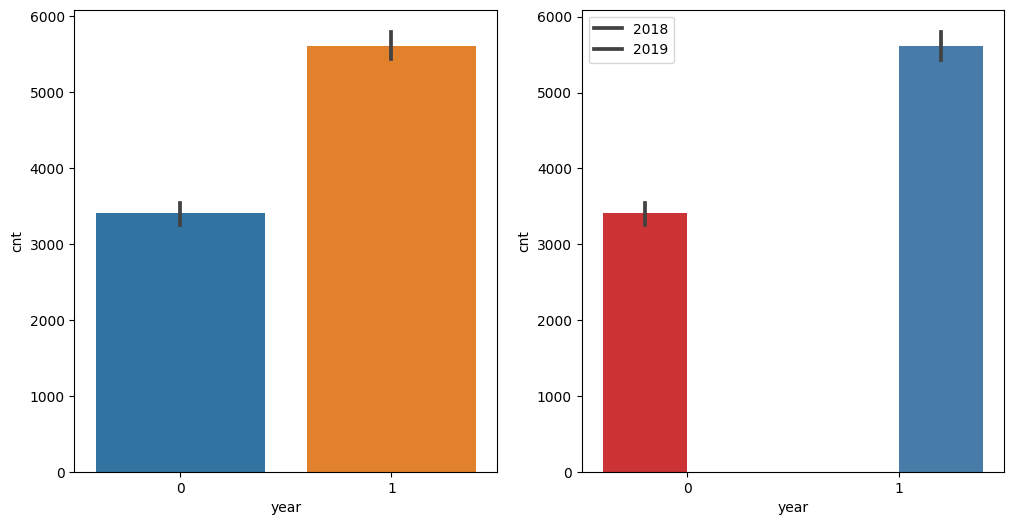

In [25]:
# plotting visualization for year column
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x='year',y='cnt',data=day_data)
plt.subplot(1,2,2)
sns.barplot(x='year',y='cnt',data=day_data, hue='year',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

- There were more number of booking in 2019 as compared to 2018

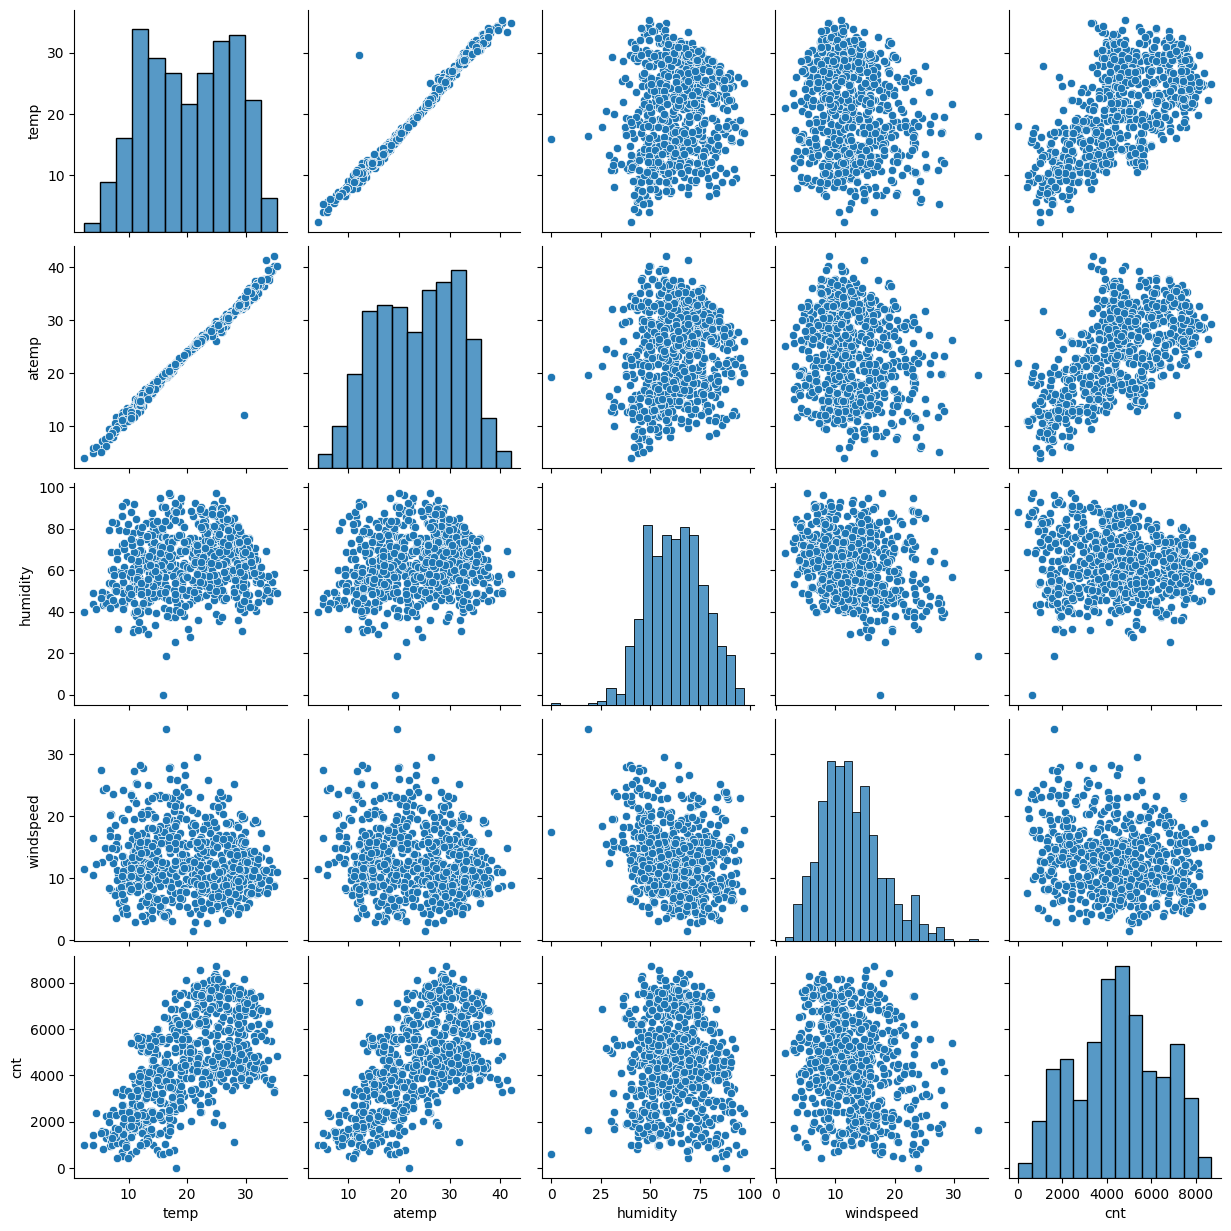

In [26]:
# Visualizing the numerical columns

sns.pairplot(data=day_data,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

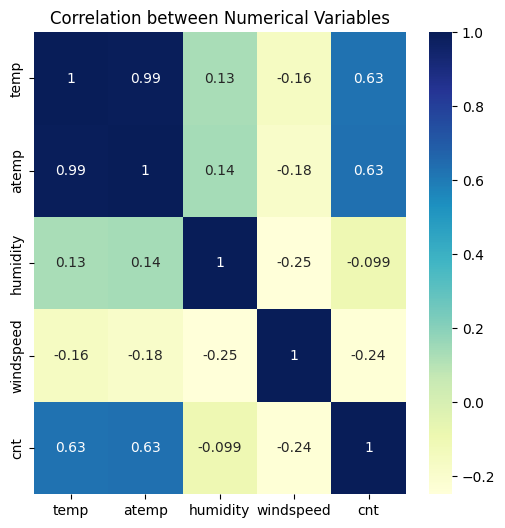

In [27]:
# Checking the correlation between the numerical variables
#sns.heatmap(day_data.corr(), cmap="YlGnBu", annot = True)
#plt.show()
plt.figure(figsize = (6,6))
sns.heatmap(day_data[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation between Numerical Variables")
plt.show()

As is visible from the pairplot and the heatmap, the variable `temp` and `atemp` have linear relationship. We cannot use both the parameters in model due to multicolinearity;therefore let's
drop `atemp` .
Lets decide which parameters to keep basis on VIF and p-value w.r.t to other variables.


In [28]:
# Dropping atemp from data.

day_data.drop('atemp' , axis=1, inplace=True)

# Checking the info of dataset after dropping
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   humidity    730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


# Step 3: Data Preparation

In [29]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months=pd.get_dummies(day_data.month,drop_first=True)
weekdays=pd.get_dummies(day_data.weekday,drop_first=True)
weathersit=pd.get_dummies(day_data.weathersit,drop_first=True)
seasons=pd.get_dummies(day_data.season,drop_first=True)


In [30]:
day_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,1600


In [31]:
# Merging  the dataframe, with the dummy variable dataset. 

day_data = pd.concat([day_data,months,weekdays,weathersit,seasons],axis=1)

In [32]:
day_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [33]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   humidity        730 non-null    float64
 9   windspeed       730 non-null    float64
 10  cnt             730 non-null    int64  
 11  aug             730 non-null    uint8  
 12  dec             730 non-null    uint8  
 13  feb             730 non-null    uint8  
 14  jan             730 non-null    uint8  
 15  july            730 non-null    uint8  
 16  june            730 non-null    uint8  
 17  mar             730 non-null    uin

In [34]:
# dropping unnecessary columns as we have already created dummy variable out of it.

day_data.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [35]:
day_data.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [36]:
day_data.shape

(730, 29)

In [37]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   humidity        730 non-null    float64
 5   windspeed       730 non-null    float64
 6   cnt             730 non-null    int64  
 7   aug             730 non-null    uint8  
 8   dec             730 non-null    uint8  
 9   feb             730 non-null    uint8  
 10  jan             730 non-null    uint8  
 11  july            730 non-null    uint8  
 12  june            730 non-null    uint8  
 13  mar             730 non-null    uint8  
 14  may             730 non-null    uint8  
 15  nov             730 non-null    uint8  
 16  oct             730 non-null    uint8  
 17  sep             730 non-null    uin

# Step 4: Splitting the Data into Training and Testing Sets

In [38]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(day_data, train_size = 0.7, random_state = 100)

In [39]:
# check the shape of training datatset

df_train.shape

(510, 29)

In [40]:
# check the shape of testing datatset

df_test.shape

(220, 29)

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            510 non-null    int64  
 1   holiday         510 non-null    int64  
 2   workingday      510 non-null    int64  
 3   temp            510 non-null    float64
 4   humidity        510 non-null    float64
 5   windspeed       510 non-null    float64
 6   cnt             510 non-null    int64  
 7   aug             510 non-null    uint8  
 8   dec             510 non-null    uint8  
 9   feb             510 non-null    uint8  
 10  jan             510 non-null    uint8  
 11  july            510 non-null    uint8  
 12  june            510 non-null    uint8  
 13  mar             510 non-null    uint8  
 14  may             510 non-null    uint8  
 15  nov             510 non-null    uint8  
 16  oct             510 non-null    uint8  
 17  sep             510 non-null    u

In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            220 non-null    int64  
 1   holiday         220 non-null    int64  
 2   workingday      220 non-null    int64  
 3   temp            220 non-null    float64
 4   humidity        220 non-null    float64
 5   windspeed       220 non-null    float64
 6   cnt             220 non-null    int64  
 7   aug             220 non-null    uint8  
 8   dec             220 non-null    uint8  
 9   feb             220 non-null    uint8  
 10  jan             220 non-null    uint8  
 11  july            220 non-null    uint8  
 12  june            220 non-null    uint8  
 13  mar             220 non-null    uint8  
 14  may             220 non-null    uint8  
 15  nov             220 non-null    uint8  
 16  oct             220 non-null    uint8  
 17  sep             220 non-null    u

In [43]:
# Using MinMaxScaler to Rescaling the features
# Instantiate object
scaler = MinMaxScaler()

In [44]:
# verifying the dataset before scaling.

df_train.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,48.3333,23.500518,1796,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,72.9583,14.707907,1683,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [45]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [46]:
df_train.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [47]:
# Describing the dataset
df_train[num_vars].describe()

,temp,humidity,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


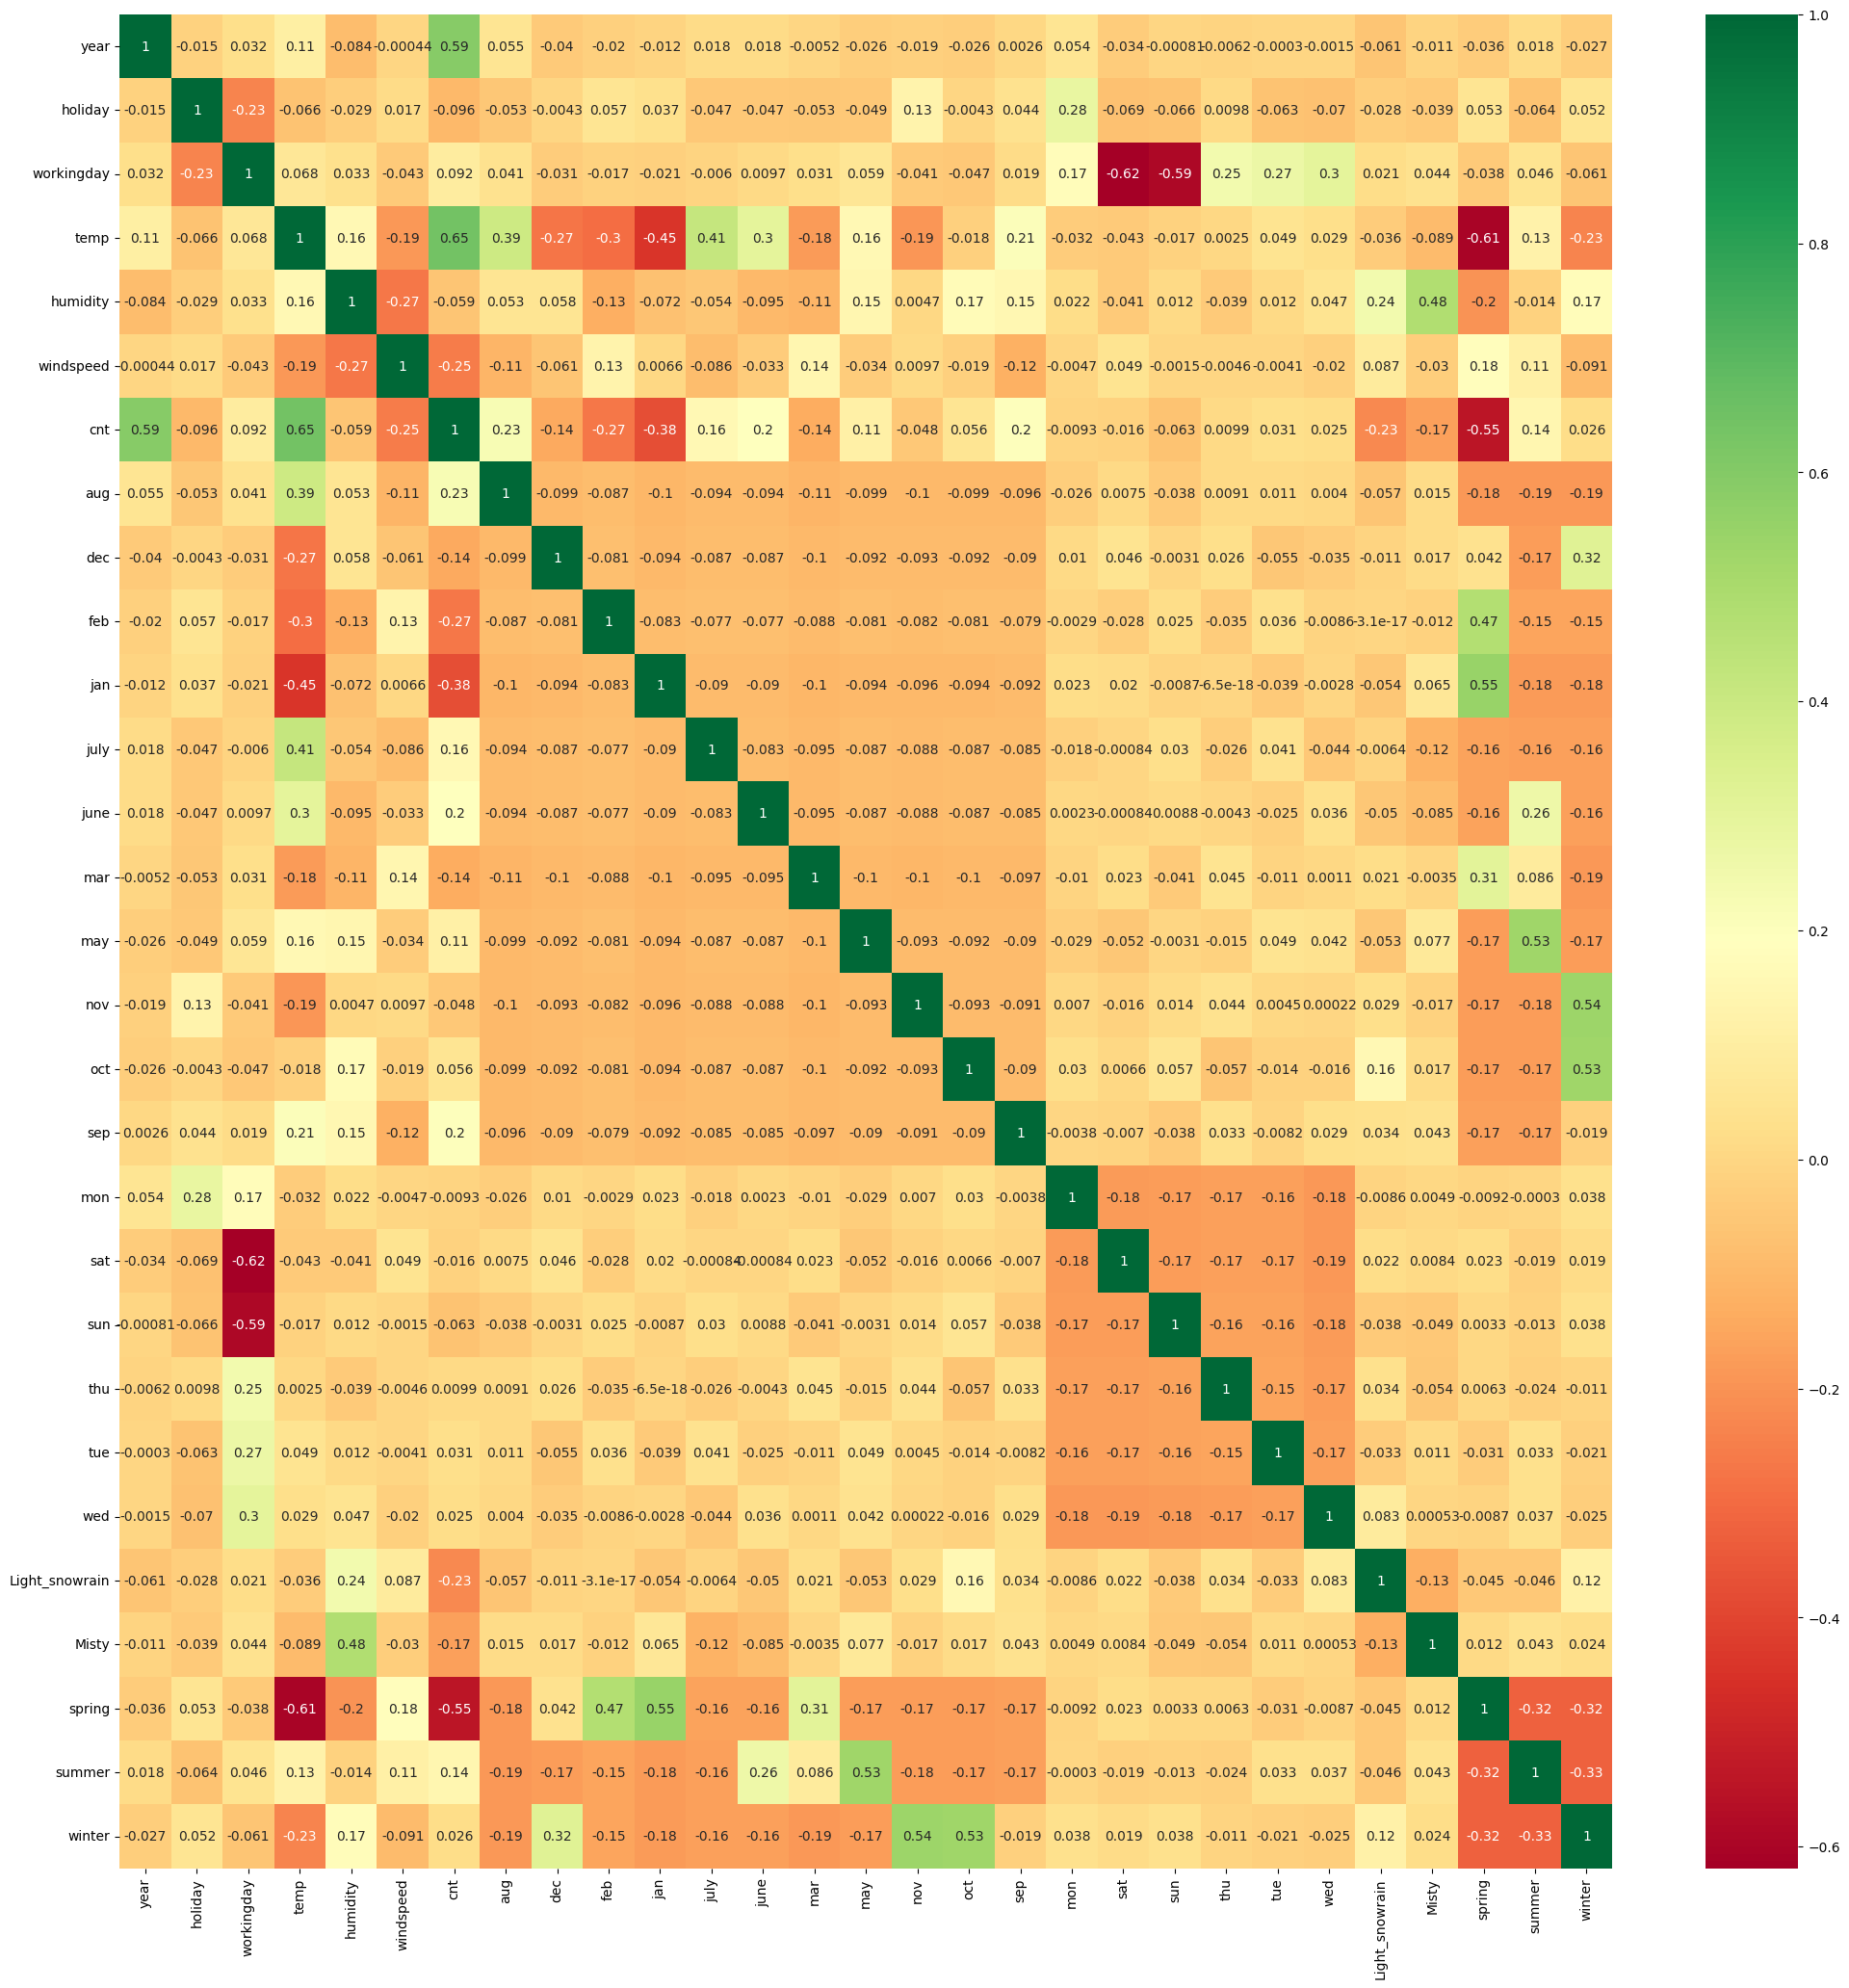

In [48]:
# checking the correlation coefficients to observe which variables are highly correlated

plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

From the heatmap we can see `cnt` have corelation with `year` and `temp` .

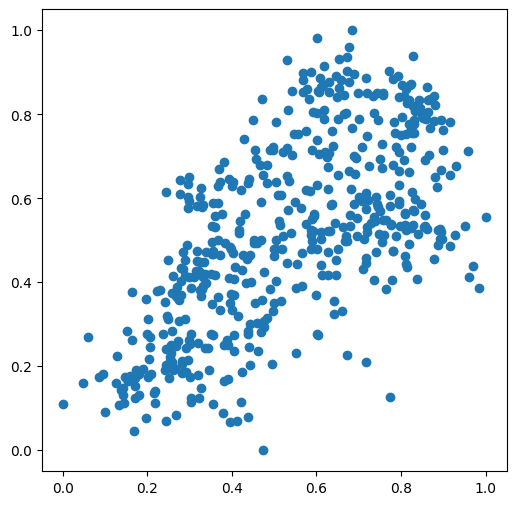

In [49]:
# Visualizing temp corelation with cnt via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

- Therefore, it shows positive corelation between temp and cnt.

In [50]:
# Extracting X_train and y_train from trainig dataset
y_train = df_train.pop('cnt')
X_train = df_train

In [51]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [52]:
#List of variables selected by RFE

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 13),
 ('mar', False, 14),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 11),
 ('tue', False, 9),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [53]:
# Selecting the varibles selected via RFE in list
X_train.columns[rfe.support_]

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'july', 'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring',
       'summer', 'winter'],
      dtype='object')

In [54]:
#Checking columns rejected via RFE
X_train.columns[~(rfe.support_)]

Index(['aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'thu', 'tue', 'wed'],
      dtype='object')

In [55]:
# Creating dataframe with RFE selected variables

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,year,holiday,workingday,temp,humidity,windspeed,july,sep,sat,sun,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,1,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,1,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,1,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,1,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,1,0,1,0


In [56]:
#Creating a function for calculating VIF
def calcVIF(df):
    df=df.drop(['const'],axis=1)
    vif = pd.DataFrame()
    X=df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

# Step 4 : Building the Linear Model

In [57]:
# Adding constant
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Thu, 15 Jun 2023   Prob (F-statistic):          2.11e-191
Time:                        20:05:51   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1995      0.028      7.

In [58]:
lr_1.params

const             0.199526
year              0.229763
holiday          -0.018447
workingday        0.083669
temp              0.527708
humidity         -0.161086
windspeed        -0.180875
july             -0.054616
sep               0.081983
sat               0.093668
sun               0.040636
Light_snowrain   -0.245009
Misty            -0.056344
spring           -0.055546
summer            0.053733
winter            0.099214
dtype: float64

In [59]:
#Calculating VIF for first training model
calcVIF(X_train_lm_1)

,Features,VIF
2,workingday,50.68
8,sat,12.20
9,sun,11.79
12,spring,5.02
3,temp,3.62
14,winter,3.49
1,holiday,2.91
13,summer,2.62
4,humidity,1.91
11,Misty,1.57


- `holiday` shows high p-value and low VIF values hence we can drop it



In [60]:
X_train_new = X_train_rfe.drop(['holiday'], axis = 1)


- Building 2 linear regression model

In [61]:

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Thu, 15 Jun 2023   Prob (F-statistic):          2.11e-191
Time:                        20:05:52   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1811      0.042      4.

In [62]:
calcVIF(X_train_lm_2)

,Features,VIF
3,humidity,32.10
2,temp,18.99
1,workingday,18.41
4,windspeed,4.91
7,sat,4.91
11,spring,4.80
8,sun,4.76
13,winter,3.69
12,summer,3.04
10,Misty,2.31


In [63]:
# We can drop humidity variable as it has low p-value and high VIF
X_train_new = X_train_new.drop(['humidity'], axis = 1)


In [64]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Thu, 15 Jun 2023   Prob (F-statistic):          1.28e-188
Time:                        20:05:52   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1008      0.038      2.

In [65]:
calcVIF(X_train_lm_3)

,Features,VIF
1,workingday,16.19
2,temp,12.74
3,windspeed,4.76
6,sat,4.45
7,sun,4.21
10,spring,3.82
12,winter,2.78
11,summer,2.76
0,year,2.07
4,july,1.60


In [66]:
# We can drop workingday variable as it has low p-value and high VIF
X_train_new = X_train_new.drop(['workingday'], axis = 1)


In [67]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Thu, 15 Jun 2023   Prob (F-statistic):          2.06e-186
Time:                        20:05:52   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2003      0.030      6.

In [68]:
calcVIF(X_train_lm_4)

,Features,VIF
1,temp,5.18
2,windspeed,4.62
10,summer,2.24
9,spring,2.11
0,year,2.07
11,winter,1.82
3,july,1.59
8,Misty,1.55
4,sep,1.33
5,sat,1.22


In [69]:
# We can drop sat variable as it has high p-value and low VIF
X_train_new = X_train_new.drop(['sat'], axis = 1)


In [70]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Thu, 15 Jun 2023   Prob (F-statistic):          3.37e-187
Time:                        20:05:52   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2034      0.030      6.

In [71]:
calcVIF(X_train_lm_5)

,Features,VIF
1,temp,5.14
2,windspeed,4.60
9,summer,2.23
8,spring,2.09
0,year,2.07
10,winter,1.80
3,july,1.59
7,Misty,1.55
4,sep,1.33
5,sun,1.17


### Observations: lr_5 is our model for evaluation;
    - The VIF and p-values both are in considerable range
    - R-squared measures the strength of the relationship between your model and the dependent variable on a scale of 0 to 100%; which is 83.6%.
    - The adjusted R-squared adjusts for the number of terms in the model which is around 83.2%
    - We took the p-values and VIF high-low values for dropping the variables and building the model.

# Model Evaluation on train data

In [72]:
#Checking the trainig dataset from which we got lr_5 
X_train_lm_5.head()

,const,year,temp,windspeed,july,sep,sun,Light_snowrain,Misty,spring,summer,winter
576,1.0,1,0.815169,0.264686,1,0,0,0,0,0,0,0
426,1.0,1,0.442393,0.255342,0,0,0,0,1,1,0,0
728,1.0,1,0.245101,0.663106,0,0,1,0,0,1,0,0
482,1.0,1,0.395666,0.188475,0,0,0,0,1,0,1,0
111,1.0,0,0.345824,0.380981,0,0,0,0,1,0,1,0


In [73]:
#Calculation y_train predicted value
y_train_pred = lr_5.predict(X_train_lm_5)

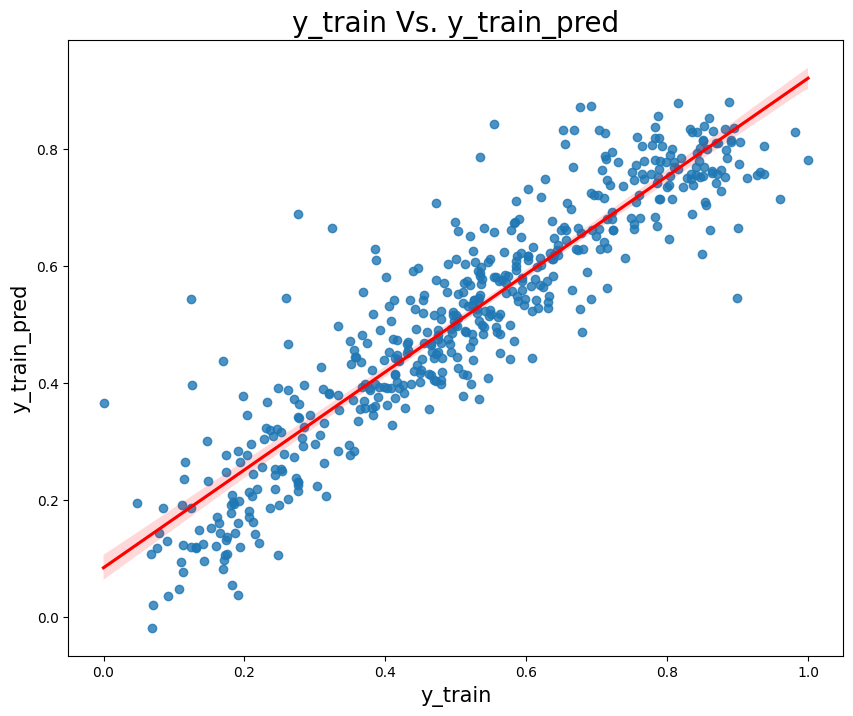

In [74]:
# Visualising y_train vs y_train_pred
plt.figure(figsize=(10, 8))
reg_plot = sns.regplot(x=y_train, y=y_train_pred, line_kws={'color': 'red'})
plt.title('y_train Vs. y_train_pred', fontdict={'fontsize': 20})
plt.xlabel('y_train', fontdict={'fontsize': 15})
plt.ylabel('y_train_pred', fontdict={'fontsize': 15})

plt.show()

# Step 6: Residual Analysis of the train data and validation

<Figure size 640x480 with 0 Axes>

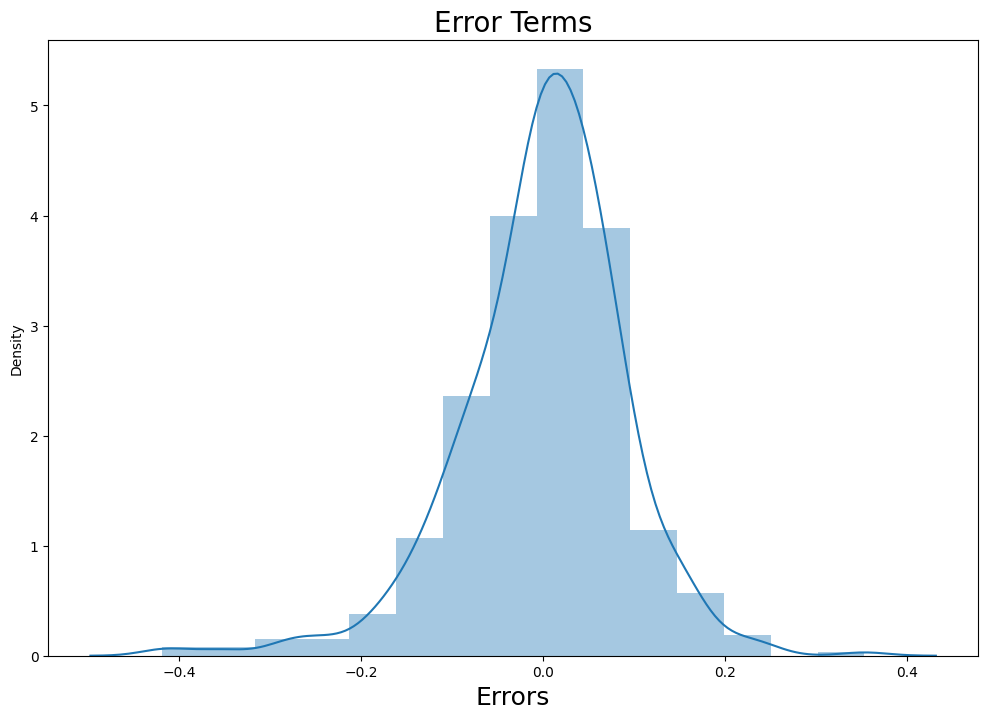

In [75]:
fig = plt.figure()
plt.figure(figsize=(12, 8))
sns.distplot((y_train - y_train_pred), bins=15)
plt.title('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)
plt.show()

# Observation: We can see that Error terms are normally distributed and centered around 0

# Prediction on Test Data

In [76]:
df_test.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [77]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [78]:
df_test[num_vars].describe()

,temp,humidity,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.638221,0.313293,0.522154
std,0.233187,0.148694,0.159584,0.219163
min,0.046591,0.261915,-0.042808,0.048205
25%,0.355429,0.529197,0.198843,0.378595
50%,0.558172,0.625590,0.300126,0.524678
75%,0.755981,0.743798,0.402718,0.677750
max,0.984424,1.002146,0.807474,0.963300


### Splitting test data into X_test and y_test

In [79]:
y_test = df_test.pop('cnt')
X_test = df_test

In [80]:
X_test.head()

,year,holiday,workingday,temp,humidity,windspeed,aug,dec,feb,jan,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [81]:
X_train_lm_5.drop(['const'], inplace=True , axis=1)

In [82]:
# Creating X_test_new with columns that are in the final model
X_test_new = X_test[X_train_lm_5.columns]

# Adding constant
X_test_new = sm.add_constant(X_test_new)

# Making predictions using final model on test data
y_test_pred = lr_5.predict(X_test_new)


### Model Evaluation on Test Data

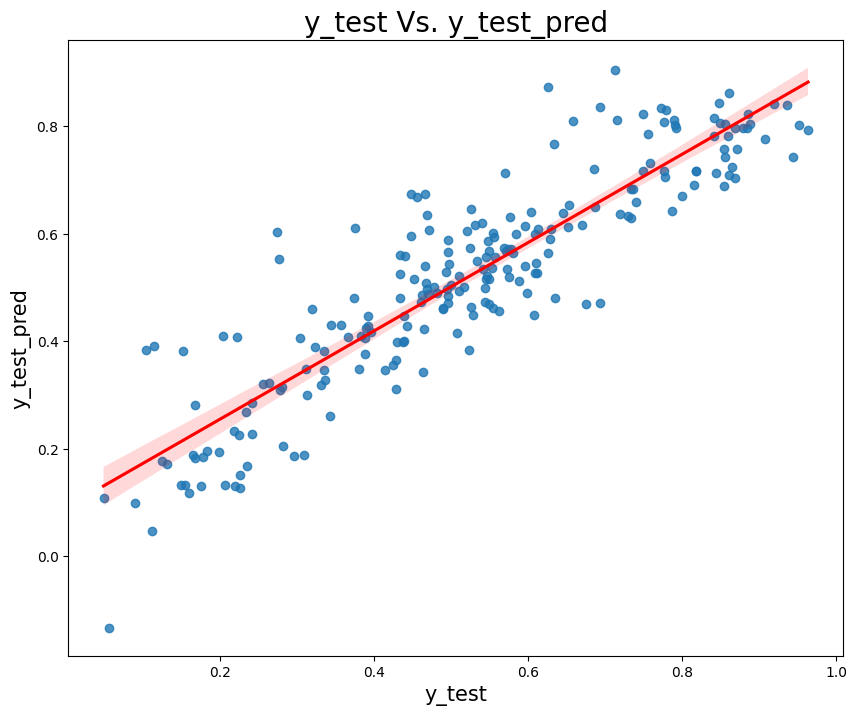

In [83]:
# Let's visualize y_test vs. y_test_pred
plt.figure(figsize=(10, 8))
reg_plot = sns.regplot(x=y_test, y=y_test_pred, line_kws={'color': 'red'})
plt.title('y_test Vs. y_test_pred', fontdict={'fontsize': 20})
plt.xlabel('y_test', fontdict={'fontsize': 15})
plt.ylabel('y_test_pred', fontdict={'fontsize': 15})
plt.show()

### Calculating R-sqaured and Ajusted R-squared value for final model on test data

In [84]:
# R-squared value for the final model on test set
r2 = r2_score(y_test, y_test_pred)
print(r2)


0.8057616301094372


In [85]:
# Adjusted R-squared value for the final model on test set
adj_r2 = 1-(1-r2)*((df_test.shape[0]-1)/(df_test.shape[0]-11-1))
print(adj_r2)

0.7954894086248402


In [87]:
lr_5.params.sort_values(ascending=False)

temp              0.491742
year              0.233876
const             0.203387
winter            0.081830
sep               0.072321
summer            0.047885
sun              -0.044959
july             -0.048253
spring           -0.068197
Misty            -0.080237
windspeed        -0.149694
Light_snowrain   -0.284654
dtype: float64


$ Count = 0.203 + 0.491 \times B1 + 0.233 \times B2 + 0.081 \times B3 + 0.072 \times B4 + 0.047 \times B5 - 0.044 \times B6 - 0.048 \times B7 - 0.068 \times B8 -    0.080 \times B9 + 0.149 \times B10 + 0.284 \times B11 

## Observation:

- Train dataset R^2          : 0.836
- Test dataset R^2           : 0.805
- Train dataset Adjusted R^2 : 0.832    
- Test dataset Adjusted R^2  : 0.795


From the above evaluation we can say that bikes demand depend on the following  predictors for :
- `temp` : denotes the temperature
- `year` : denotes year for bike sharing
- `winter` : denotes the season
- `sep` : denotes September month
- `summer` : denotes the season
- `sun` : denotes Sunday
- `july` : denotes July month
- `spring` : denotes season
- `misty` : denotes weather condition
- `windspeed` : denotes weather condition
- `Light_Snowrain` : denotes weather condition


### Equation of Regression line; where Bi denotes the variables with i as the variable number in list of predictors mentioned above:

cnt = 0.203 + 0.491*B1 + 0.233*B2 + 0.081*B3 + 0.072*B4 + 0.047*B5 - 0.044 *B6 - 0.048*B7 - 0.068*B8 -    0.080*B9 - 0.149*B10 - 0.284*B11 